In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
N = 4
c = np.array([0, 0.5, 0.5, 1])
print(c)

b = np.array([1/6, 1/3, 1/3, 1/6])
print(b)

a = np.zeros((N, N))
a[0] = np.array([0, 0, 0, 0])
a[1] = np.array([0.5, 0, 0, 0])
a[2] = np.array([0, 0.5, 0, 0])
a[3] = np.array([0, 0, 1, 0])
print(a)

[ 0.   0.5  0.5  1. ]
[ 0.16666667  0.33333333  0.33333333  0.16666667]
[[ 0.   0.   0.   0. ]
 [ 0.5  0.   0.   0. ]
 [ 0.   0.5  0.   0. ]
 [ 0.   0.   1.   0. ]]


In [161]:
def myfun(t, y):
    x = y[0]
    v = y[1]
    
    x_prime = v
    v_prime = -x
    
    return np.array([x_prime, v_prime])
#    return np.cos(t)

def rk_generic(N, c, b, a, h, t, y, fun):
    k = np.zeros((N, len(y0)))
    k[0] = fun(t, y)
    k[1] = fun(t + h*c[1], y + h*a[1,0]*k[0])
    k[2] = fun(t + h*c[2], y + h*a[2,1]*k[1])
    k[3] = fun(t + h*c[3], y + h*a[3,2]*k[2])
    
    #print(k)
    
    return y + h*np.sum([b[ii]*k[ii] for ii in range(N)])
#    for ii in range(N-1):
#        k[ii+1] = fun(t + h*c[ii+1], y + h*np.sum([a[ii+1,jj] for jj in range(ii-1)]))
#    return y + h*np.sum([b[ii]*k[ii] for ii in range(N)])

In [162]:
y0 = np.array([0.0, 0.1])
#y0 = np.array([0.0])

t = 0
h = 0.01
rk_generic(N, c, b, a, h, t, y0, myfun)

array([ 0.00099498,  0.10099498])

In [163]:
myfun(0, y0)

array([ 0.1, -0. ])

In [164]:
y = y0
tspan = np.linspace(0, 2*np.pi, 100)
dt = tspan[1]-tspan[0]

yspan = np.array([y0])
for ii in range(len(tspan)-1):
    y = rk_generic(N, c, b, a, dt, tspan[ii], y, myfun)
    yspan = np.append(yspan,[y], axis=0)
    #print(t, y)

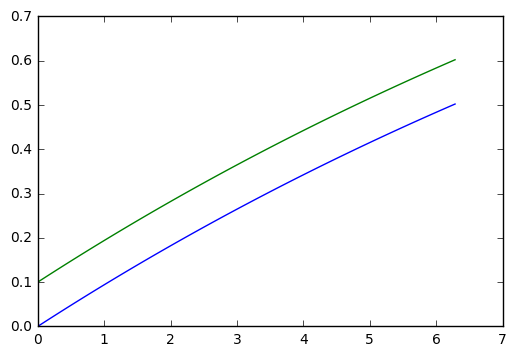

In [165]:
plt.plot(tspan, yspan)